# HW 6

ISE 530 Optimization for Analytics Homework VI: On linearly constrained, including quadratic minimization and from Cottle-Thapa. Due 11:59 PM Wednesday October 28, 2020

- Find the minimum norm solution of the linear system:

\begin{align}
    x_1 + x_2 + 5x_3 − 7x_4 &= 1 \\
    x_1 − 3x_2 − x_3 + x_4 &= 2 \\
\end{align}

by first formulating a quadratic program to minimize the sum of squares of the variables subject to the two equations. Solve the resulting program by introducing Lagrangian multipliers of the constraints and solving the resulting optimality conditions. Verify your solution by expressing the variables $x_1$ and $x_2$ in terms of $x_3$ and $x_4$, ending up with a quadratic minimization problem in two variables and no constraints whose solution can be readily obtained.

- Consider the quadratic program in three variables:

\begin{align}
    \underset{x_1,x_2,x_3}{\text{minimize }} & 2x^2_1 + x_1x_2 + 2x^2_2 + x^2_3 + 2x_2x_3 \\
    \text{subject to } 
    &0.8x_1 + 0.4x_2 + 0.6x_3 \geq 0.5 \\
    &x_1 + x_2 + x_3 = 1,\text{ and }x_1, x_2, x_3, \geq 0. \\
\end{align}

(a) Show that the objective function is strictly convex.

(b) Write down the optimality conditions for the problem. Are they necessary and sufficient for optimality?

(c) Starting at the feasible solution of $x_1 = x_2 = x_3 = 1/3$, carry out 3 iterations of the feasible descent method using the active constraints at each iterate to solve the program.

- Do Exercise 11.9. Enumerate all possibilities of the complementary slackness conditions to find an optimal solution of the problem.

- Do Exercises 12.8 and 12.10.

- Consider the problem:

\begin{align}
    \underset{x}{\text{minimize }} & 2x_1x_2 + x_2x_3 + x_1x_3 \\
    \text{subject to } & 3x_1 + 3x_2 + 2x_3 = 3. \\
\end{align}

Write and solve the KKT optimality conditions of the problem. Is the computed solution $x$ a local minimum? Explain.

- Consider the nonnegatively constrained problem:
\begin{align}
    \underset{x \geq 0}{\text{minimize }} & \frac{4}{3}{[x^2_1 - x_1x_2 + x^2_2]}^{3/4} + x^2_3 - 2x_1x_3 + x^2_1. \\
\end{align}

(a) Write the KKT conditions for the problem? Are they necessary?

(b) Starting at $x^0 = (0, 1/4, 1/2)$, carry out several iterations of the feasible descent method (using the active constraints at each iterate) until an observable pattern emerges.

(c) Can you solve the problem analytically using the KKT conditions and say something about the method when you stop it?

In [140]:
%load_ext autotime
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (16, 12)

import operator
import pandas as pd
import numpy as np
import cvxpy as cp
import scipy as sp
from sympy import Matrix
from scipy import optimize

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
time: 6.91 ms


<IPython.core.display.Javascript object>

---
- Find the minimum norm solution of the linear system:

\begin{align}
    x_1 + x_2 + 5x_3 − 7x_4 &= 1 \\
    x_1 − 3x_2 − x_3 + x_4 &= 2 \\
\end{align}

by first formulating a quadratic program to minimize the sum of squares of the variables subject to the two equations. Solve the resulting program by introducing Lagrangian multipliers of the constraints and solving the resulting optimality conditions. Verify your solution by expressing the variables $x_1$ and $x_2$ in terms of $x_3$ and $x_4$, ending up with a quadratic minimization problem in two variables and no constraints whose solution can be readily obtained.

Quadratic Program:

\begin{align}
    \underset{x}{\text{minimize }} & {\vert \vert x \vert \vert} \\
    \text{subject to } 
    &Ax = b \\
    A = \begin{bmatrix} 1 & 1 & 5 & -7 \\ 1 & -3 & -1 & 1 \end{bmatrix}\,,\,
    &b = \begin{bmatrix} 1 \\ 2 \end{bmatrix}\,,\,
    x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\x_4 \end{bmatrix}
\end{align}

In [3]:
A = np.array([[1, 1, 5, -7], [1, -3, -1, 1]])
b = np.array([1, 2])

time: 566 µs


<IPython.core.display.Javascript object>

Solution via Lagrange Multipliers (By LCQ constraint qualification):

\begin{align}
    \mathcal{L}(x, \lambda) &= x^\top x - (Ax - b)^\top\lambda \\
\end{align}

Stationarity:

\begin{align}
    \nabla_x\mathcal{L}(x, \lambda) &= 0 \\
    \nabla_x x^\top x - (Ax - b)^\top\lambda &= 0 \\
    2x - A^\top\lambda &= 0 \\
    x^* &= \frac{1}{2} A^\top \lambda \\
\end{align}

Primal feasibility:

\begin{align}
    Ax &= b \\
    \text{Substituting }x=x^*, A(\frac{1}{2} A^\top \lambda) &= b \\
    \frac{1}{2} AA^\top \lambda &= b \\
    \lambda^* &= 2{(AA^\top)}^{-1}b \\
\end{align}

In [6]:
λ_star = 2 * np.linalg.inv(A @ A.T) @ b
λ_star

array([0.11173184, 0.46368715])

time: 2.17 ms


<IPython.core.display.Javascript object>

Substituting $\lambda=\lambda^*$ into $x^* = \frac{1}{2} A^\top \lambda$,

\begin{align}
    x^* &= \frac{1}{2} A^\top \lambda^* \\
    &= A^\top {(AA^\top)}^{-1}b \\
\end{align}

In [94]:
x_star = 0.5 * A.T @ λ_star
np.round(x_star, 2)

array([ 0.29, -0.64,  0.05, -0.16])

time: 2.52 ms


<IPython.core.display.Javascript object>

Verify your solution by expressing the variables $x_1$ and $x_2$ in terms of $x_3$ and $x_4$ ([Least-squares technique](https://faculty.math.illinois.edu/~mlavrov/docs/484-spring-2019/ch4lec4.pdf)):

In [28]:
augmented_matrix = np.concatenate((A, np.expand_dims(b, axis=1)), axis=1)
rref, leading_idxs = Matrix(augmented_matrix, permute_l=False).rref()
rref

Matrix([
[1, 0, 7/2, -5,  5/4],
[0, 1, 3/2, -2, -1/4]])

time: 3.48 ms


<IPython.core.display.Javascript object>

After Gaussian Elimination, we choose $x_3$ and $x_4$ as the free variables, and $x_1$ and $x_2$ as the leading variables:

\begin{align}
    x_1 &= -\frac{7}{2}x_3 + 5x_4 + \frac{5}{4} \\
    x_2 &= -\frac{3}{2}x_3 + 2x_4 - \frac{1}{4} \\
\end{align}

Hence, our generic solution is:

\begin{align}
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
        x_4 \\
    \end{bmatrix}
    &=
    \underbrace{
    \begin{bmatrix}
        \frac{5}{4} \\
        -\frac{1}{4} \\
        0 \\
        0 \\
    \end{bmatrix}}_{\text{Specific solution for Homogeneous system}}
    +
    x_3
    \begin{bmatrix}
        -\frac{7}{2} \\
        -\frac{3}{2} \\
        1 \\
        0 \\
    \end{bmatrix}
    +
    x_4
    \begin{bmatrix}
        5 \\
        2 \\
        0 \\
        1 \\
    \end{bmatrix}
\end{align}

Our problem transforms from a minimum norm problem to a least squares problem:

\begin{align}
    \underset{x_3, x_4 \in \mathbb{R}^2}{\text{minimize }} & 
    \Bigg\vert\Bigg\vert
    \begin{bmatrix}
        -\frac{7}{2} & 5 \\
        -\frac{3}{2} & 2 \\
        1 & 0 \\
        0 & 1 \\
    \end{bmatrix}
    \begin{bmatrix}
        x_3 \\
        x_4 \\
    \end{bmatrix}
    -
    \begin{bmatrix}
        -\frac{5}{4} \\
        \frac{1}{4} \\
        0 \\
        0 \\
    \end{bmatrix}
    \Bigg\vert\Bigg\vert
    \\
\end{align}

Linear least squares problem, where $X$ is the data matrix, $\beta$ are the coefficients, and $y$ is the response variable:

\begin{align}
    \underset{\beta}{\text{minimize }} & 
    \vert\vert
        X\beta - y
    \vert\vert
    \\
\end{align}

Solution:

\begin{align}
    \beta^* &= {(X^\top X)}^{-1}X^\top y
\end{align}

Hence, solution to our problem is:

In [89]:
X = np.float64(np.concatenate((-rref[:, 2:4], np.eye(2)), axis=0))
y = np.float64(np.concatenate((-rref[:, -1], np.zeros((2, 1)))))
β_star = np.linalg.inv(X.T @ X) @ X.T @ y
β_star

array([[ 0.04748603],
       [-0.15921788]])

time: 3.66 ms


<IPython.core.display.Javascript object>

Solution:

In [93]:
np.round(X @ β_star - y, 2)

array([[ 0.29],
       [-0.64],
       [ 0.05],
       [-0.16]])

time: 2.48 ms


<IPython.core.display.Javascript object>

Hence, we arrive at the same solution as the original min norm problem.

Sanity Check

In [32]:
x = cp.Variable(shape=(4,), integer=False)
obj = cp.Minimize(cp.norm2(x))
constraints = [A @ x == b]
prob = cp.Problem(obj, constraints=constraints)
prob.solve()
print(
    " | ".join(
        [f"x_{idx}: {np.round(opt_x, 2)}" for idx, opt_x in zip(range(1, 5), x.value)]
    )
)

x_1: 0.29 | x_2: -0.64 | x_3: 0.05 | x_4: -0.16
time: 8.78 ms


<IPython.core.display.Javascript object>

---
- Consider the quadratic program in three variables:

\begin{align}
    \underset{x_1,x_2,x_3}{\text{minimize }} & 2x^2_1 + x_1x_2 + 2x^2_2 + x^2_3 + 2x_2x_3 \\
    \text{subject to } 
    &0.8x_1 + 0.4x_2 + 0.6x_3 \geq 0.5 \\
    &x_1 + x_2 + x_3 = 1,\text{ and }x_1, x_2, x_3, \geq 0. \\
\end{align}

(a) Show that the objective function is strictly convex.

Gradient Vector:

\begin{bmatrix}
    4x_1 + x_2 \\
    x_1 + 4x_2 + 2x_3 \\
    2x_2 + 2x_3 \\
\end{bmatrix}

Hessian $H$:

\begin{bmatrix}
    4 & 1 & 0 \\
    1 & 4 & 2 \\
    0 & 2 & 2 \\
\end{bmatrix}

In [95]:
np.linalg.eigvals(np.array([[4, 1, 0], [1, 4, 2], [0, 2, 2]]))

array([5.68133064, 3.64207363, 0.67659572])

time: 3.68 ms


<IPython.core.display.Javascript object>

Since all the eigenvalues of the Hessian are strictly $> 0$, our Hessian is positive definite, and our objective function is strictly convex. $\blacksquare$

(b) Write down the optimality conditions for the problem. Are they necessary and sufficient for optimality?

Lagrangian:

\begin{align}
    \mathcal{L}(x, \mu, \lambda) &= \frac{1}{2}x^\top H x - \lambda(x_1+x_2+x_3-1) - \mu(0.8x_1+0.4x_2+0.6x_3-0.5) \\
\end{align}

KKT Conditions:

Stationarity:

\begin{align}
    \nabla_x\mathcal{L}(x, \lambda, \mu) &= 0 \\
    Hx^* - \lambda\begin{bmatrix} 1 \\ 1 \\ 1 \\ \end{bmatrix} - \mu\begin{bmatrix} 0.8 \\ 0.4 \\ 0.6 \\ \end{bmatrix} &= 0 \\
    \begin{bmatrix} 4x_1 + x_2 - \lambda - 0.8\mu \\ x_1 + 4x_2 + 2x_3 - \lambda - 0.4\mu \\ 2x_2 + 2x_3 - \lambda - 0.6\mu \\ \end{bmatrix} &= \begin{bmatrix} 0 \\ 0 \\ 0 \\ \end{bmatrix} \\
\end{align}

Primal Feasibility:

\begin{align}
    x_1+x_2+x_3 &= 1 \\
    0.8x_1+0.4x_2+0.6x_3 &= 0.5 \\
\end{align}

Dual Feasibility:

\begin{align}
    \lambda \text{ free} \\ 
    \mu \geq 0
\end{align}

Complementary Slackness:

\begin{array}{lll}
    \text{free } \lambda &  & x_1+x_2+x_3 = 1 \\ 
    0 \leq \mu^\top & \perp & 0.8x_1+0.4x_2+0.6x_3-0.5 \geq 0 \\
\end{array}

Since the constraints are affine, by the Linear Constraint Qualification (LCQ), the KKT conditions above are necessary. Furthermore, since our objective function is strictly convex, these conditions are also sufficient conditions for optimality, meaning that a $x^*$ found to fulfill the KKT conditions above is definitely a strict minimizer of the objective function.

(c) Starting at the feasible solution of $x_1 = x_2 = x_3 = 1/3$, carry out 3 iterations of the feasible descent method using the active constraints at each iterate to solve the program.

In [233]:
H = np.array([[4, 1, 0], [1, 4, 2], [0, 2, 2]])
f = (
    lambda x: 2 * (x[0] ** 2)
    + x[0] * x[1]
    + 2 * (x[1] ** 2)
    + x[2] ** 2
    + 2 * x[1] * x[2]
)
f_prime = lambda x: np.array(
    [4 * x[0] + x[1], x[0] + 4 * x[1] + 2 * x[2], 2 * x[1] + 2 * x[2]]
)
inequality_constraints = lambda x: np.array(
    [np.array([0.8, 0.4, 0.6]) @ x - 0.5, x[0], x[1], x[2],]
)

equality_constraints = lambda x: np.array([np.array([1] * 3) @ x - 1,])

time: 2.1 ms


<IPython.core.display.Javascript object>

In [236]:
def armijo_line_search(f, f_prime, x_k, p_k, α, ρ=0.8, σ=0.8):
    """Armijo Backtracking Line Search
    
    Args:
        α: Initial step size
        ρ: Backtracking factor
        σ: Bending factor
    """
    m = 0
    while True:
        if m > 0:
            α = ρ ** m
        if f(x_k + α * p_k) <= f(x_k) + σ * α * f_prime(x_k).T @ p_k:
            return α
        else:
            m += 1


def constrained_feasible_direction(
    f_prime, x_k, inequality_constraints, equality_constraints
):

    d = cp.Variable(shape=(len(x_k,)), integer=False)
    lhs_inequality_constraints = inequality_constraints(x_k)
    binding_constraints = lambda x: inequality_constraints(x)[
        np.argwhere(np.allclose(lhs_inequality_constraints, 0))
    ]
    obj = cp.Minimize(f_prime(x_k).T @ d)
    ec = (
        [equality_constraint == 0 for equality_constraint in equality_constraints(d)]
        if equality_constraints is not None and equality_constraints(d).shape[0] > 0
        else None
    )
    bc = (
        [binding_constraint == 0 for binding_constraint in binding_constraints(d)]
        if binding_constraints is not None and binding_constraints(d).shape[0] > 0
        else None
    )
    if bc is None and ec is None:
        prob = cp.Problem(obj, constraints=None)
    elif bc is None:
        prob = cp.Problem(obj, constraints=ec)
    elif ec is None:
        prob = cp.Problem(obj, constraints=bc)
    else:
        prob = cp.Problem(obj, constraints=bc + ec)
    prob.solve()

    """
        If the optimal objective value of this linear program is zero, then x¯, together with a pair of optimal
        dual solution (µ, λ), yields a KKT triple. Otherwise, the linear program must have an unbounded
        objective value tending to −∞ along a direction ¯d. Such a direction ¯
        d is then a feasible descent
        direction of f at the current feasible point x¯. A maximum step size τmax > 0 is then determined
        such that x¯ + τ ¯
        d is feasible for all τ in the interval [ 0, τmax ].
    """
    if prob.status == "unbounded":
        print("Direction d is a feasible descent direction!")
        feasible_direction = np.array([-0.5, -0.5, 1])
        print("d:", feasible_direction)
        τ_max = min(
            [
                -lhs_inequality_constraints[idx]
                / (
                    inequality_constraints(x_k + feasible_direction)[idx]
                    - lhs_inequality_constraints[idx]
                )
                for idx, lhs in enumerate(lhs_inequality_constraints)
                if (
                    inequality_constraints(x_k + feasible_direction)[idx]
                    - lhs_inequality_constraints[idx]
                )
                < 0
            ]
        )
        print("τ_max:", τ_max)
    return feasible_direction, τ_max


def feasible_descent(
    f,
    f_prime,
    x_0=np.array([1 / 3] * 3),
    inequality_constraints=inequality_constraints,
    equality_constraints=equality_constraints,
    ε=1e-15,
    steplength_algo=armijo_line_search,
):
    k, x_k = 0, x_0
    while True:

        # 1. Test for Convergence
        if np.allclose(f_prime(x_k), 0, rtol=ε):
            return x_k

        # 2. Compute a search direction
        p_k, τ_max = constrained_feasible_direction(
            f_prime=f_prime,
            x_k=x_k,
            inequality_constraints=inequality_constraints,
            equality_constraints=equality_constraints,
        )

        # 3. Compute a steplength
        α_k = steplength_algo(f=f, f_prime=f_prime, x_k=x_k, p_k=p_k, α=τ_max)

        print(
            f"Iteration: {k} - x_{k} = {np.round(x_k, 5)}, p_k = {np.round(p_k, 5)}, α_k = {np.round(α_k, 5)}"
        )

        # 4. Update the iterate and return to Step 1
        k += 1
        x_k += α_k * p_k

        # Check for divergence
        if np.allclose(x_k, x_k + α_k * p_k) and k > 1:
            print("Series diverged.")
            break

time: 6.6 ms


<IPython.core.display.Javascript object>

In [237]:
feasible_descent(
    f,
    f_prime,
    x_0=np.array([1 / 3] * 3),
    inequality_constraints=inequality_constraints,
    equality_constraints=equality_constraints,
    ε=1e-15,
    steplength_algo=armijo_line_search,
)

Direction d is a feasible descent direction!
d: [-0.5 -0.5  1. ]
τ_max: 0.6666666666666666
Iteration: 0 - x_0 = [0.33333 0.33333 0.33333], p_k = [-0.5 -0.5  1. ], α_k = 0.0859
Direction d is a feasible descent direction!
d: [-0.5 -0.5  1. ]
τ_max: 0.5807673207466666
Iteration: 1 - x_1 = [0.29038 0.29038 0.41923], p_k = [-0.5 -0.5  1. ], α_k = 0.06872
Direction d is a feasible descent direction!
d: [-0.5 -0.5  1. ]
τ_max: 0.5120478440106666
Iteration: 2 - x_2 = [0.25602 0.25602 0.48795], p_k = [-0.5 -0.5  1. ], α_k = 0.04398
Direction d is a feasible descent direction!
d: [-0.5 -0.5  1. ]
τ_max: 0.4680673788996266
Iteration: 3 - x_3 = [0.23403 0.23403 0.53193], p_k = [-0.5 -0.5  1. ], α_k = 0.02252
Direction d is a feasible descent direction!
d: [-0.5 -0.5  1. ]
τ_max: 0.44554938076277406
Iteration: 4 - x_4 = [0.22277 0.22277 0.55445], p_k = [-0.5 -0.5  1. ], α_k = 0.01801
Direction d is a feasible descent direction!
d: [-0.5 -0.5  1. ]
τ_max: 0.42753498225329206
Iteration: 5 - x_5 = [0

<IPython.core.display.Javascript object>

UNBOUNDED.

---
- Do Exercise 11.9. Enumerate all possibilities of the complementary slackness conditions to find an optimal solution of the problem.

Write down the KKT conditions for the following quadratic program:

\begin{align}
    \text{minimize } & x^2_1 +x^2_2 +x^2_3 −x_1x_2 −x_2x_3 −3x_1 −2x_2 +x_3 \\
    \text{subject to } & x_1 \geq 0, x_2 \geq 0, x_3 \geq 0.
\end{align}

In [114]:
H = np.array([[2, -1, 0], [-1, 2, 0], [0, -1, 2]])
c = np.array([-3, -2, 1])
# x = cp.Variable(shape=(3,), integer=False)
# obj = cp.Minimize(cp.quad_form(x, H) + c @ x)
# constraints = [x >= 0]
# prob = cp.Problem(obj, constraints=constraints)
# prob.solve()
# print(
#     " | ".join(
#         [f"x_{idx}: {np.round(opt_x, 2)}" for idx, opt_x in zip(range(1, 4), x.value)]
#     )
# )

time: 827 µs


<IPython.core.display.Javascript object>

Gradient Vector:

\begin{align}
    \begin{bmatrix}
        2x_1 - x_2 - 3 \\
        -x_1 + 2x_2 - 2 \\
        - x_2 + 2x_3 + 1 \\
    \end{bmatrix}
    &=
    Hx + \begin{bmatrix} -3 \\ -2 \\ 1 \\ \end{bmatrix}
\end{align}

Hessian $H$:

\begin{bmatrix}
    2 & -1 & 0 \\
    -1 & 2 & 0 \\
    0 & -1 & 2 \\
\end{bmatrix}

Quadratic Form:

\begin{align}
    \text{minimize } & \frac{1}{2} x^\top H x + c^\top x \\
    \text{subject to } & x_1 \geq 0, x_2 \geq 0, x_3 \geq 0. \\
    \newline \\
    c = \begin{bmatrix} -3 \\ -2 \\ 1 \\ \end{bmatrix}
    ,\,& x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \end{bmatrix}
    \\
\end{align}

Lagrangian:

\begin{align}
    \mathcal{L}(x) &= \frac{1}{2}x^\top H x + c^\top x \\
\end{align}

KKT Conditions for optimal $x = x^*$:

Stationarity:

\begin{align}
    \nabla_x\mathcal{L}(x) &= 0 \\
    Hx^* + c &= 0 \\
\end{align}

Primal Feasibility:

\begin{align}
   x^* &\geq 0 \\
\end{align}

Complementary Slackness:

\begin{array}{lll}
    0 \leq x_1 & \perp & \frac{\partial \mathcal{L(x)}}{\partial x_1} = 2x_1 - x_2 - 3 \geq 0 \\
    0 \leq x_2 & \perp & \frac{\partial \mathcal{L(x)}}{\partial x_2} = -x_1 + 2x_2 - 2 \geq 0 \\
    0 \leq x_3 & \perp & \frac{\partial \mathcal{L(x)}}{\partial x_3} = -x_2 + 2x_3 + 1 \geq 0 \\
\end{array}

Case 1: $x_1=0, x_2=0, x_3=0$

$2x_1 - x_2 - 3 = -3 \not\geq 0$.

Case 2: $x_1>0, x_2=0, x_3=0$

$2x_1 - x_2 - 3 = 0 \rightarrow x_2 = -3$, INFEASIBLE.

Case 3: $x_1=0, x_2>0, x_3=0$

$-x_1 + 2x_2 - 2 = 0 \rightarrow x_1 = -2$, INFEASIBLE.

Case 4: $x_1=0, x_2=0, x_3>0$

$-x_2 + 2x_3 + 1 = 0 \rightarrow x_3=-1/2$, INFEASIBLE and CONTRADICTING.

Case 5: $x_1>0, x_2>0, x_3=0$

$2x_1 - x_2 - 3 = 0$ and $-x_1 + 2x_2 - 2 = 0$

In [101]:
np.linalg.inv(np.array([[2, -1], [-1, 2]])) @ np.array([3, 2])

array([2.66666667, 2.33333333])

time: 2.5 ms


<IPython.core.display.Javascript object>

Stationarity is not fulfilled, solution though feasible, is not optimal.

Case 6: $x_1=0, x_2>0, x_3>0$

$-x_1 + 2x_2 - 2 = 0 \rightarrow x_2 = 1$ and $-x_2 + 2x_3 + 1 = 0 \rightarrow x_3 = 0$.

In [109]:
H @ np.array([0, 1, 0]) + np.array([3, 2, -1])

array([ 2,  4, -2])

time: 2.28 ms


<IPython.core.display.Javascript object>

Stationarity is not fulfilled, solution though feasible, is not optimal.

Case 7: $x_1>0, x_2=0, x_3>0$

$2x_1 - x_2 - 3 = 0 \rightarrow x_1 = 3/2$ and $-x_2 + 2x_3 + 1 = 0 \rightarrow x_3 = -1/2$, INFEASIBLE.

Case 8: $x_1>0, x_2>0, x_3>0$

$2x_1 - x_2 - 3 = 0$ and $-x_1 + 2x_2 - 2 = 0$ and $-x_2 + 2x_3 + 1 = 0$

In [110]:
x_star = np.linalg.inv(np.array([[2, -1, 0], [-1, 2, 0], [0, -1, 2]])) @ np.array(
    [3, 2, -1]
)
x_star

array([2.66666667, 2.33333333, 0.66666667])

time: 2.68 ms


<IPython.core.display.Javascript object>

In [113]:
np.allclose(H @ x_star + c, 0)

True

time: 2.12 ms


<IPython.core.display.Javascript object>

This case fulfills all the KKT conditions, and so is optimal.

---
- Do Exercises 12.8 and 12.10.

12.8

Minimize the function

\begin{align}
    f (x_1, x_2) &= x_1 − x_2 − x^2_1 + x^2_2 \\
\end{align}

subject to the constraints given in Examples 12.12 and 12.13.

Example 12.12 & 12.13 constraints:

\begin{align}
    \text{minimize } & x_1 − x_2 − x^2_1 + x^2_2 \\
    \text{subject to } & −x_1 − x_2 \geq −2 \\
    & x_1 − 2x_2 \geq −2 \\
    & x_1 \geq 0 \\
    & x_2 \geq 0 \\
\end{align}

Gradient Vector:

\begin{align}
    \begin{bmatrix}
        1 - 2x_1 \\
        -1 + 2x_2 \\
    \end{bmatrix}
    &=
    Hx + \begin{bmatrix} 1 \\ -1 \\ \end{bmatrix}
\end{align}

Hessian $H$:

\begin{bmatrix}
    -2 & 0 \\
    0 & 2 \\
\end{bmatrix}

Quadratic Form:

\begin{align}
    \text{minimize } & \frac{1}{2} x^\top H x + c^\top x \\
    \text{subject to } & Ex \geq f \\
    \newline \\
    c = \begin{bmatrix} 1 \\ -1 \\ \end{bmatrix}
    ,\,& x = \begin{bmatrix} x_1 \\ x_2 \\ \end{bmatrix} 
    ,\, E = \begin{bmatrix} -1 & -1 \\ 1 & -2 \\ \end{bmatrix} 
    ,\, f = \begin{bmatrix} -2 \\ -2 \\ \end{bmatrix} 
    \\
\end{align}

Lagrangian:

\begin{align}
    \mathcal{L}(x, \mu) &= \frac{1}{2}x^\top H x + c^\top x - (Ex - f)\mu \\
\end{align}

KKT Conditions for optimal $x = x^*$:

Stationarity:

\begin{align}
    \nabla_x\mathcal{L}(x, \mu) &= 0 \\
    Hx^* + c - E^\top \mu &= 0 \\
\end{align}

Primal Feasibility:

\begin{align}
    Ex^* - f &\geq 0 \\
\end{align}

Dual Feasibility:

\begin{align}
    \mu \geq 0
\end{align}

Complementary Slackness:

\begin{array}{lll}
    0 \leq x_1 & \perp & \frac{\partial \mathcal{L(x, \mu)}}{\partial x_1} = -2x_1 + 1 + \mu_1 -\mu_2 \geq 0 \\
    0 \leq x_2 & \perp & \frac{\partial \mathcal{L(x, \mu)}}{\partial x_2} = 2x_2 - 1 + \mu_1 + 2\mu_2 \geq 0 \\
    0 \leq \mu_1 & \perp & -x_1-x_2+2 \geq 0 \\
    0 \leq \mu_2 & \perp & x_1-2x_2+2 \geq 0 \\
\end{array}

Case 1: $x_1>0, x_2>0, \mu_1=0, \mu_2=0$

In [124]:
x_star = np.linalg.inv(np.array([[-1, -1], [1, -2]])) @ np.array([-2, -2])
x_star

array([0.66666667, 1.33333333])

time: 2.4 ms


<IPython.core.display.Javascript object>

Stationarity:

In [125]:
np.allclose(np.array([[-2, 1], [2, -1]]) @ x_star, 0)

True

time: 2.36 ms


<IPython.core.display.Javascript object>

Primal Feasibility:

In [128]:
np.alltrue(np.array([[-1, -1], [1, -2]]) @ x_star >= np.array([-2, -2]))

True

time: 2.27 ms


<IPython.core.display.Javascript object>

KKT conditions are fulfilled and so solution is optimal.

12.10

(Based on an example by P.B. Zwart [202].) Consider the quadratic program

\begin{align}
    \text{maximize } & Q(x) = 2x^2_1 + x_1x_2 + 2x_2 \\
    \text{subject to } & 1.5x_1 + x_2 \leq 1.4 \\
    & x_1 + x_2 \leq 1 \\
    & x_1 \geq 0 \\
    & x_2 \geq -10 \\
\end{align}

In [193]:
Q = lambda x: 2 * (x[0] ** 2) + x[0] * x[1] + 2 * x[1]
E = np.array([[1.5, 1], [1, 1], [-1, 0], [0, -1]])
f = np.array([1.4, 1, 0, 10])
# x = cp.Variable(shape=(2,), integer=False)
# obj = cp.Minimize(Q(x))
# constraints = [E@x<=f]
# prob = cp.Problem(obj, constraints=constraints)
# prob.solve()
# print(
#     " | ".join(
#         [f"x_{idx}: {np.round(opt_x, 2)}" for idx, opt_x in zip(range(1, 3), x.value)]
#     )
# )

time: 3.05 ms


<IPython.core.display.Javascript object>

(a) Graph the feasible region of this optimization problem.

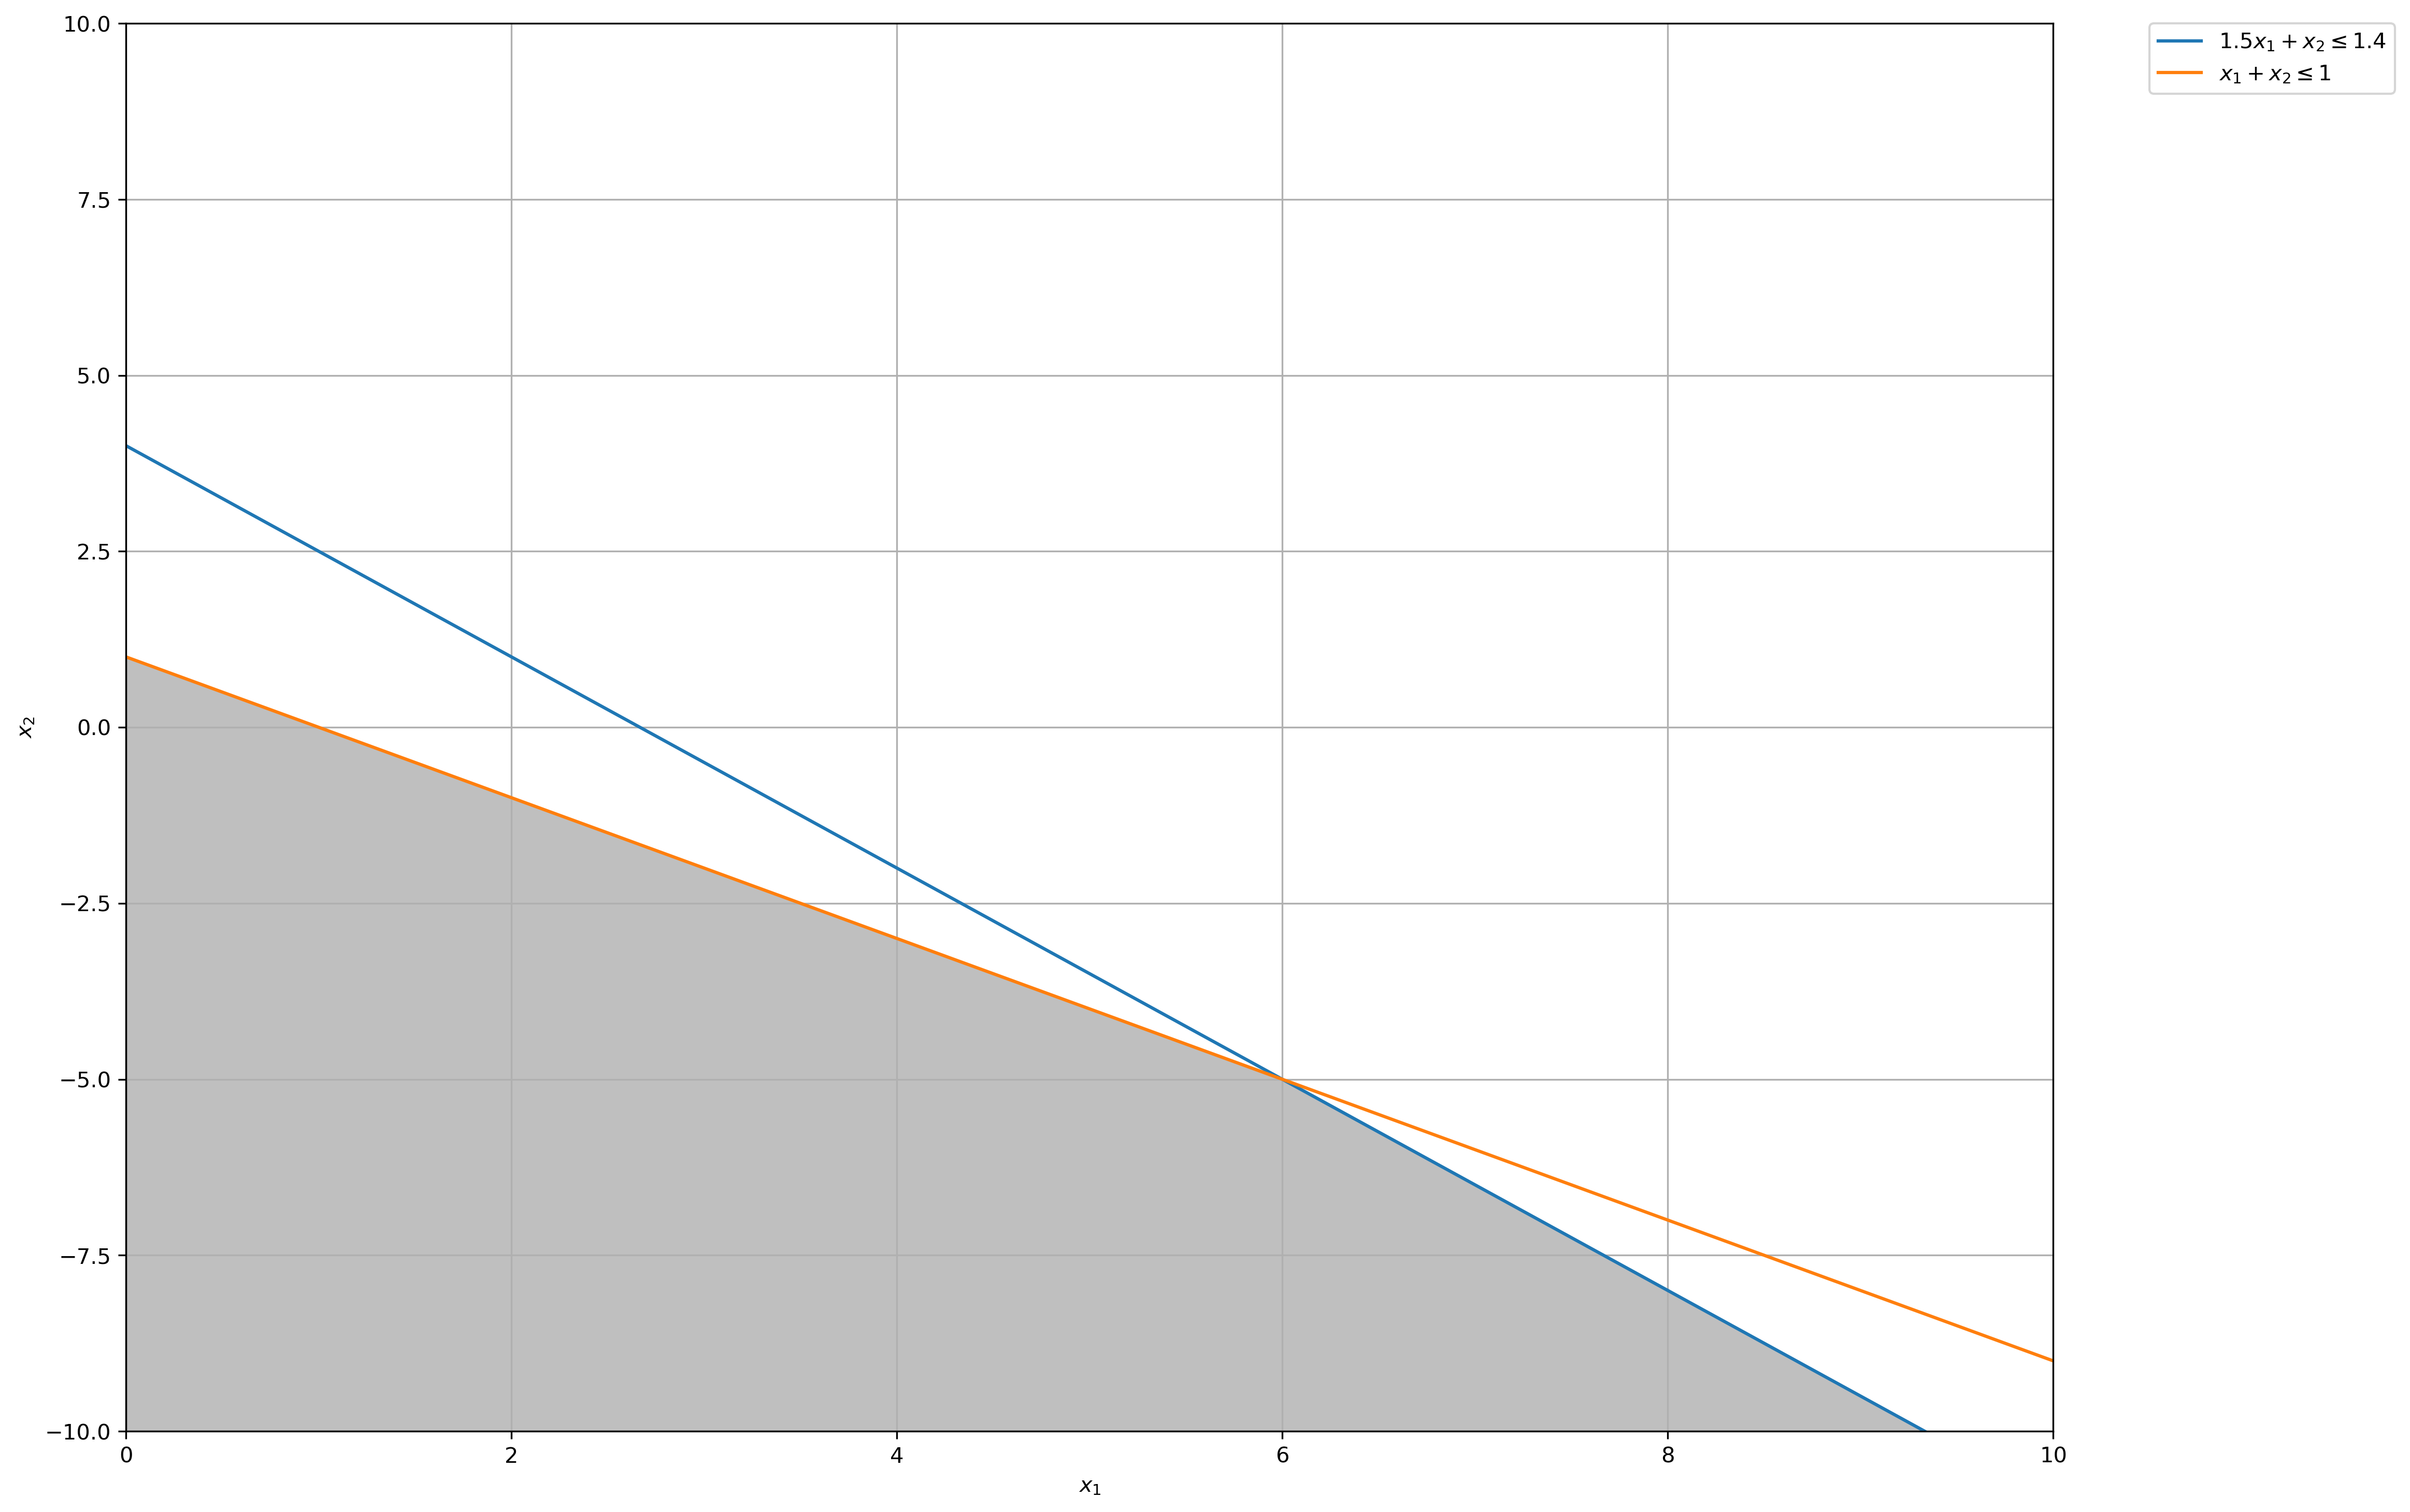

time: 1.41 s


<IPython.core.display.Javascript object>

In [121]:
# Construct lines
x_1 = np.linspace(0, 20, 2000)  # x_1 >= 0
x_2_1 = lambda x_1: -1.5 * x_1 + 4  # constraint 1: 1.5𝑥1 + 𝑥2 ≤ 1.4
x_2_2 = lambda x_1: -x_1 + 1  # constraint 2: 𝑥1 + 𝑥2 ≤ 1

# Make plot
plt.plot(x_1, x_2_1(x_1), label=r"$1.5x_1 + x_2 \leq 1.4$")
plt.plot(x_1, x_2_2(x_1), label=r"$x_1 + x_2 \leq 1$")
plt.xlim((0, 10))
plt.ylim((-10, 10))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region
y = np.minimum(x_2_1(x_1), x_2_2(x_1))
x = [-10] * len(x_1)
plt.fill_between(x_1, x, y, where=y > x, color="grey", alpha=0.5)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

(b) Is the point $\bar{x} = (0, 1)$ a local maximum for this problem? Justify your answer.

Hessian:

\begin{bmatrix}
    4 & 1 \\
    1 & 0 \\
\end{bmatrix}

In [129]:
np.linalg.eigvals(np.array([[4, 1], [1, 0]]))

array([ 4.23606798, -0.23606798])

time: 2.1 ms


<IPython.core.display.Javascript object>

---
- Consider the problem:

\begin{align}
    \underset{x}{\text{minimize }} & 2x_1x_2 + x_2x_3 + x_1x_3 \\
    \text{subject to } & 3x_1 + 3x_2 + 2x_3 = 3. \\
\end{align}

Write and solve the KKT optimality conditions of the problem. Is the computed solution $x$ a local minimum? Explain.

In [100]:
f = lambda x: 2 * x[0] * x[1] + x[1] * x[2] + x[0] * x[2]
# x = cp.Variable(shape=(3,), integer=False)
# obj = cp.Minimize(f(x))
# constraints = [3 * x[0] + 3 * x[1] + 2 * x[2] == 3]
# prob = cp.Problem(obj, constraints=constraints)
# prob.solve()
# print(
#     " | ".join(
#         [f"x_{idx}: {np.round(opt_x, 2)}" for idx, opt_x in zip(range(1, 4), x.value)]
#     )
# )

time: 727 µs


<IPython.core.display.Javascript object>

KKT Conditions:

Stationarity:

\begin{align}
    2x_2 + x_3 + 3\lambda &= 0 \\
    2x_1 + x_3 + 3\lambda &= 0 \\
    x_2 + x_1 + 2\lambda &= 0 \\
\end{align}

Primal Feasibility:

\begin{align}
    3x_1 + 3x_2 + 2x_3 &= 3 \\
\end{align}

Dual Feasibility:

\begin{align}
    \lambda \text{ free.} \\
\end{align}

In [118]:
print("Solution by KKT: ")
np.linalg.inv(
    np.array([[0, 2, 1, 3], [2, 0, 1, 3], [1, 1, 0, 2], [3, 3, 2, 0]])
) @ np.array([0, 0, 0, 3])

Solution by KKT: 


array([ 0.375,  0.375,  0.375, -0.375])

time: 3.41 ms


<IPython.core.display.Javascript object>

Hessian:

\begin{bmatrix}
    0 & 2 & 1 \\
    2 & 0 & 1 \\
    1 & 1 & 0 \\
\end{bmatrix}

In [117]:
np.linalg.eigvals(np.array([[0, 2, 1], [2, 0, 1], [1, 1, 0]]))

array([ 2.73205081, -2.        , -0.73205081])

time: 2.64 ms


<IPython.core.display.Javascript object>

Since the Hessian is indefinite, we can't conclude anything about whether the solution found by KKT is a local minimum.

---
- Consider the nonnegatively constrained problem:
\begin{align}
    \underset{x \geq 0}{\text{minimize }} & \frac{4}{3}{[x^2_1 - x_1x_2 + x^2_2]}^{3/4} + x^2_3 - 2x_1x_3 + x^2_1. \\
\end{align}

In [238]:
f = (
    lambda x: (4 / 3) * ((x[0] ** 2 - x[0] * x[1] + x[1] ** 2) ** (3 / 4))
    + x[2] ** 2
    - 2 * x[0] * x[2]
    + x[0] ** 2
)

f_prime = lambda x: np.array(
    [
        ((x[0] ** 2 - x[0] * x[1] + x[1] ** 2) ** (-1 / 4)) * (2 * x[0] - x[1])
        - 2 * x[2]
        + 2 * x[0],
        ((x[0] ** 2 - x[0] * x[1] + x[1] ** 2) ** (-1 / 4)) * (-x[0] + 2 * x[1]),
        2 * x[2] - 2 * x[0],
    ]
)
# x = cp.Variable(shape=(3,), integer=False)
# obj = cp.Minimize(f(x))
# constraints = [x >= 0]
# prob = cp.Problem(obj, constraints=constraints)
# prob.solve()
# print(
#     " | ".join(
#         [f"x_{idx}: {np.round(opt_x, 2)}" for idx, opt_x in zip(range(1, 4), x.value)]
#     )
# )

time: 2 ms


<IPython.core.display.Javascript object>

(a) Write the KKT conditions for the problem? Are they necessary?

KKT Conditions:

Stationarity:

\begin{align}
    {[x^2_1 - x_1x_2 + x^2_2]}^{-1/4}[2x_1-x_2] - 2x_3 + 2x_1 &= 0 \\
    {[x^2_1 - x_1x_2 + x^2_2]}^{-1/4}[-x_1+2x_2] &= 0 \\
    2x_3 - 2x_1 &= 0 \\
\end{align}

Primal Feasibility:

\begin{align}
    x_1, x_2, x_3 \geq 0 \\
\end{align}

Complementary Slackness:

\begin{array}{lll}
    0 \leq x_1 & \perp & \frac{\partial \mathcal{L(x)}}{\partial x_1} = {[x^2_1 - x_1x_2 + x^2_2]}^{-1/4}[2x_1-x_2] - 2x_3 + 2x_1 \geq 0 \\
    0 \leq x_2 & \perp & \frac{\partial \mathcal{L(x)}}{\partial x_2} = {[x^2_1 - x_1x_2 + x^2_2]}^{-1/4}[-x_1+2x_2] \geq 0 \\
    0 \leq x_3 & \perp & \frac{\partial \mathcal{L(x)}}{\partial x_3} = 2x_3 - 2x_1 \geq 0 \\
\end{array}

There are no equality constraints and the only inequality constraint is non-negativity of the solution, so they are necessary conditions.

(b) Starting at $x^0 = (0, 1/4, 1/2)$, carry out several iterations of the feasible descent method (using the active constraints at each iterate) until an observable pattern emerges.

In [239]:
feasible_descent(
    f,
    f_prime,
    x_0=np.array([0, 1 / 4, 1 / 2]),
    inequality_constraints=lambda x: np.array([x,]),
    equality_constraints=None,
    ε=1e-15,
    steplength_algo=armijo_line_search,
)

Direction d is a feasible descent direction!
d: [-0.5 -0.5  1. ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

time: 25.8 ms


<IPython.core.display.Javascript object>

(c) Can you solve the problem analytically using the KKT conditions and say something about the method when you stop it?

- No